# AI&데이터 마이닝 5일차 (2020.07.31)

# 6. 데이터의 그룹화(Clustering)
## 클러스터링 개요
### 클러스터링 목적
- 유사한 것들은 같이 그룹화 하고 다른 것들은 분리

### 클러스터링을 위해 고려해야 하는 것
- 그룹의 위치
    - 다차원 공간의 어느 그룹을 만들어야 하는가?
- 유사도
    - 데이터들의 유사도는 어떻게 측정하는가?
- 종료조건
    - 반복적인 그룹화 작업을 멈추는 조건(사람의 개입없이)은?

### Location of the group
- 어떻게 그룹을 만들지 인간이 매번 개입하는 것은 불가능
- 시간이 많이 걸릴 뿐 아니라 4차원 이상은 ???
- 그룹 생성하는 과정을 계량화 할 필요 있음
- **Centroid**  VS  **Medioid**

### 센트로이드 (Centroid)
- 유클리디언 공간(Euclidean Space) 에서의 클러스터 위치 파악 방법
- 각 그룹의 데이터 포인트의 평균
- 기하학적인 중심

### 메디오이드 (Medioid)
- 비유클리디언 공간(Non-Euclidean Space) 에서 클러스터 위치 파악 방법
    - 비유클리디언 공간
        - 문자열 속성들로 구성되는 데이터, 범주형 및 수치형 속성들이 결합된 데이터 등 유클리디언 공간에 표현이 불가능한 것들을 위한 공간
        - 유클리디언 좌표 체계가 무의미한 공간
    - 클러스터 내에서 다른 데이터 포인트들에 가장 가까운 데이터 포인트, clustoid라고 부르기도 함
- "클러스터 내에서 다른 데이터 포인트들에 가장 가까운 데이터 포인트"
    - 유사도 척도 정의 : 코사인 거리(Cosine Distance), 재커드 거리(Jaccard Distance)
    - 가장 가까운 (closet) 것의 의미 정의
        - 클러스터 내의 다른 데이터 포인트들에 대한 거리 중 최대 거리를 갖는 데이터 포인트
        - 클러스터 내의 다른 데이터 포인트들에 대한 거리 중 최소 거리를 갖는 데이터 포인트
        - 클러스터 내의 다른 데이터 포인트들에 대한 거리 제곱의 합이 가장 작은 데이터 포인트

### 유사성 척도 (Similarity Measure)
- 유클리디언 공간
    - 유클리디언 거리 (Euclidean Distance)
        - root((xi-yi)제곱)
    - 맨해튼 거리 (Manhattan Distance)
        - |xi-yi|
        - 택시 지표
        - 도시 블록 거리
    - 최대 거리 (Maximum Distance)
        - max(|xi-yi|)

- 비 유클리디언 공간
    - 코사인 거리 (Cosine Distance)
    - 두 벡터의 방향을 측정
        - Cos(0) : 1, Cos(180) : -1, Cos(90) : 0
        - CosDist(0) = 0, CosDist(180) = 2, CosDist(90) = 1
    - 자카드 거리 (Jaccard Distance)
        - 두 속성의 공통된 값들의 비율

### 종료 조건
- 클러스터링이 잘되었음을 확인하는 조건
- 목표 그룹의 수, 그룹의 크기, 모양, 위치 등의 충족 여부

- 그룹의 개수(K)가 사전에 주어진 경우
    - K개의 그룹이 만들어지고 각 그룹의 품질이 더 향상되지 않으면 종료
- 그룹의 개수가 주어지지 않은 경우
    - 그룹을 계속 생성하다가 생성된 그룹의 품질이 저하되는 경우 종료
- 품질 점수(Quality Score)와 실루엣 점수(Silhouette Score)
    - 응집도 (Cohesion) : 클러스터 내의 모든 점들 간의 총 거리
    - 분리도 (Separation) : 클러스터들 간의 총 거리
    - **실루엣 상관계수 (Silhouette Coefficient) : 응집도와 분리도를 모두 고려**
    
- 실루엣 상관계수
    - Si = (bi-ai) / max(ai,bi)
    - a : 클러스터내 점들간의 평균거리
    - b : 클러스터와 이웃하는 클러스터들의 점들간의 평균거리
- 실루엣 점수
    - siloutte score = mean(Sn)
    - 모든 점들의 평균 실루엣 상관계수
    - 범위 : -1 ~ 1
    - 값이 크면 클러스터 품질이 높음

## 클러스터링 메소드
- Means Separation
- Hierarchical Clustering
- Density Clustering
- Spectral Clustering

## 클러스터링을 위한 가상 데이터 생성
### Scikit learn의 make_blobs() 등방성 가우시안 정규분포에 따라 데이터 생성

[[ 11.49229426 -10.23618715]
 [  4.37624526  -9.15278992]
 [ -2.19367495   3.21226472]
 ...
 [ -2.31781126   4.3968464 ]
 [  0.80917198   0.95257875]
 [  1.62821554  -9.52263811]]
[0 0 1 ... 1 4 0]
        Feature_1  Feature_2
record                      
0       11.492294 -10.236187
1        4.376245  -9.152790
2       -2.193675   3.212265
3       -2.976039   3.037043
4       -2.963703   2.336960


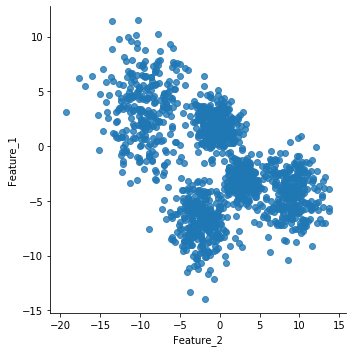

In [4]:
import pandas as pd
import seaborn as sns
from sklearn import datasets

def make_blobs():
    n_samples = 1500
    blobs = datasets.make_blobs(n_samples=n_samples, centers=5, cluster_std=[3.0, 0.9, 1.9, 1.9, 1.3], random_state=51)
    print(blobs[0])
    print(blobs[1])
    
    df = pd.DataFrame(blobs[0], columns=['Feature_1', 'Feature_2'])
    df.index.name = 'record'
    return df

df = make_blobs()
print(df.head())

sns.lmplot(x='Feature_2', y='Feature_1', data=df, fit_reg=False)

- n_samples : 표본 데이터의 수, 디폴트 100
- n_features : 독립 변수의 수, 디폴트 20
- centers : 생성할 클러스터의 수 혹은 중심, [n_centers, n_features] 크기의 배열. 디폴트 3
- cluster_std : 클러스터의 표준 편차, 디폴트 1.0
- center_box : 생성할 클러스터의 바운딩 박스(bounding box), 디폴트(-10.0, 10.0)
- X : [n_samples, n_features] 크기의 배열, 독립 변수
- y : [n_samples] 크기의 배열, 종속 변수

### K-means 클러스터링
- K개의 그룹이 주어지면 센터로이드 기반으로 k개의 그룹을 만들고 각 그룹의 품질이 수렴할때까지 센터로이드를 이동
- 알고리즘 요약
    1. 입력 데이터 포인트들로부터 k개의 초기 클러스터 중심 선택
    2. 모든 입력 데이터 포인트들에 클러스터 할당 (각 데이터 포인트와 가장 가까운 클러스터 할당)
    3. 생성된 K개 클러스터의 센터로이드를 구함
    4. k개 클러스터의 품질 점수가 수렴할때까지 반복
        1. 품질 점수의 변경이 tolerance보다 작을때



- 위치 : 센트로이드
- 유사도 척도 : 유클리디언 거리
- 품질 점수 : 응집도

In [5]:
df = make_blobs()

from sklearn.cluster import KMeans
clus = KMeans(n_clusters=5, tol=0.004, max_iter=300)

clus.fit(df)

df['K-means Cluster Labels'] = clus.labels_
print(df['K-means Cluster Labels'][:5].tolist())

df.head()

[[ 11.49229426 -10.23618715]
 [  4.37624526  -9.15278992]
 [ -2.19367495   3.21226472]
 ...
 [ -2.31781126   4.3968464 ]
 [  0.80917198   0.95257875]
 [  1.62821554  -9.52263811]]
[0 0 1 ... 1 4 0]
[2, 2, 1, 1, 1]


,Feature_1,Feature_2,K-means Cluster Labels
record,,,
0,11.492294,-10.236187,2
1,4.376245,-9.152790,2
2,-2.193675,3.212265,1
3,-2.976039,3.037043,1
4,-2.963703,2.336960,1
